# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.
keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [4]:
dataset = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset

'C:\\Users\\Miguel Angel\\.keras\\datasets\\auto-mpg.data'

Importelo usando pandas.

In [5]:
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car name"]

In [8]:
df = pd.read_csv(dataset, names=column_names, delim_whitespace=True)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### Limpia los datos

Trata los missings y variables categóricas

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
df['Horsepower'].astype(float)

ValueError: could not convert string to float: '?'

In [12]:
df[df['Horsepower']=='?']

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [13]:
df['Horsepower'] = np.where(df['Horsepower']=="?", np.nan, df['Horsepower'])
df['Horsepower'] = df['Horsepower'].astype(float)
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [15]:
df['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [21]:
df[df['Origin'] == 3]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name
14,24.0,4,113.0,95.0,2372.0,15.0,70,3,toyota corona mark ii
18,27.0,4,97.0,88.0,2130.0,14.5,70,3,datsun pl510
29,27.0,4,97.0,88.0,2130.0,14.5,71,3,datsun pl510
31,25.0,4,113.0,95.0,2228.0,14.0,71,3,toyota corona
53,31.0,4,71.0,65.0,1773.0,19.0,71,3,toyota corolla 1200
...,...,...,...,...,...,...,...,...,...
382,34.0,4,108.0,70.0,2245.0,16.9,82,3,toyota corolla
383,38.0,4,91.0,67.0,1965.0,15.0,82,3,honda civic
384,32.0,4,91.0,67.0,1965.0,15.7,82,3,honda civic (auto)
385,38.0,4,91.0,67.0,1995.0,16.2,82,3,datsun 310 gx


In [22]:
df.groupby(['Origin'])['MPG'].mean()

Origin
1    20.083534
2    27.891429
3    30.450633
Name: MPG, dtype: float64

In [24]:
pd.get_dummies(df['Origin'])

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [27]:
marcas = df['Car name'].str.split(expand=True, n=1)[0]
marcas

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397        chevy
Name: 0, Length: 398, dtype: object

In [28]:
marcas.value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: 0, dtype: int64

In [31]:
df['Marca'] = marcas.copy()
df.groupby("Marca")['MPG'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
Marca,,
vw,39.016667,6
nissan,36.000000,1
triumph,35.000000,1
honda,33.761538,13
renault,32.880000,5
datsun,31.113043,23
mazda,30.860000,10
subaru,30.525000,4
vokswagen,29.800000,1


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [32]:
df.drop(columns=['Car name', "Marca"], inplace=True)

In [33]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [34]:
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)

In [35]:
print(train.shape)
print(test.shape)

(318, 8)
(80, 8)


### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

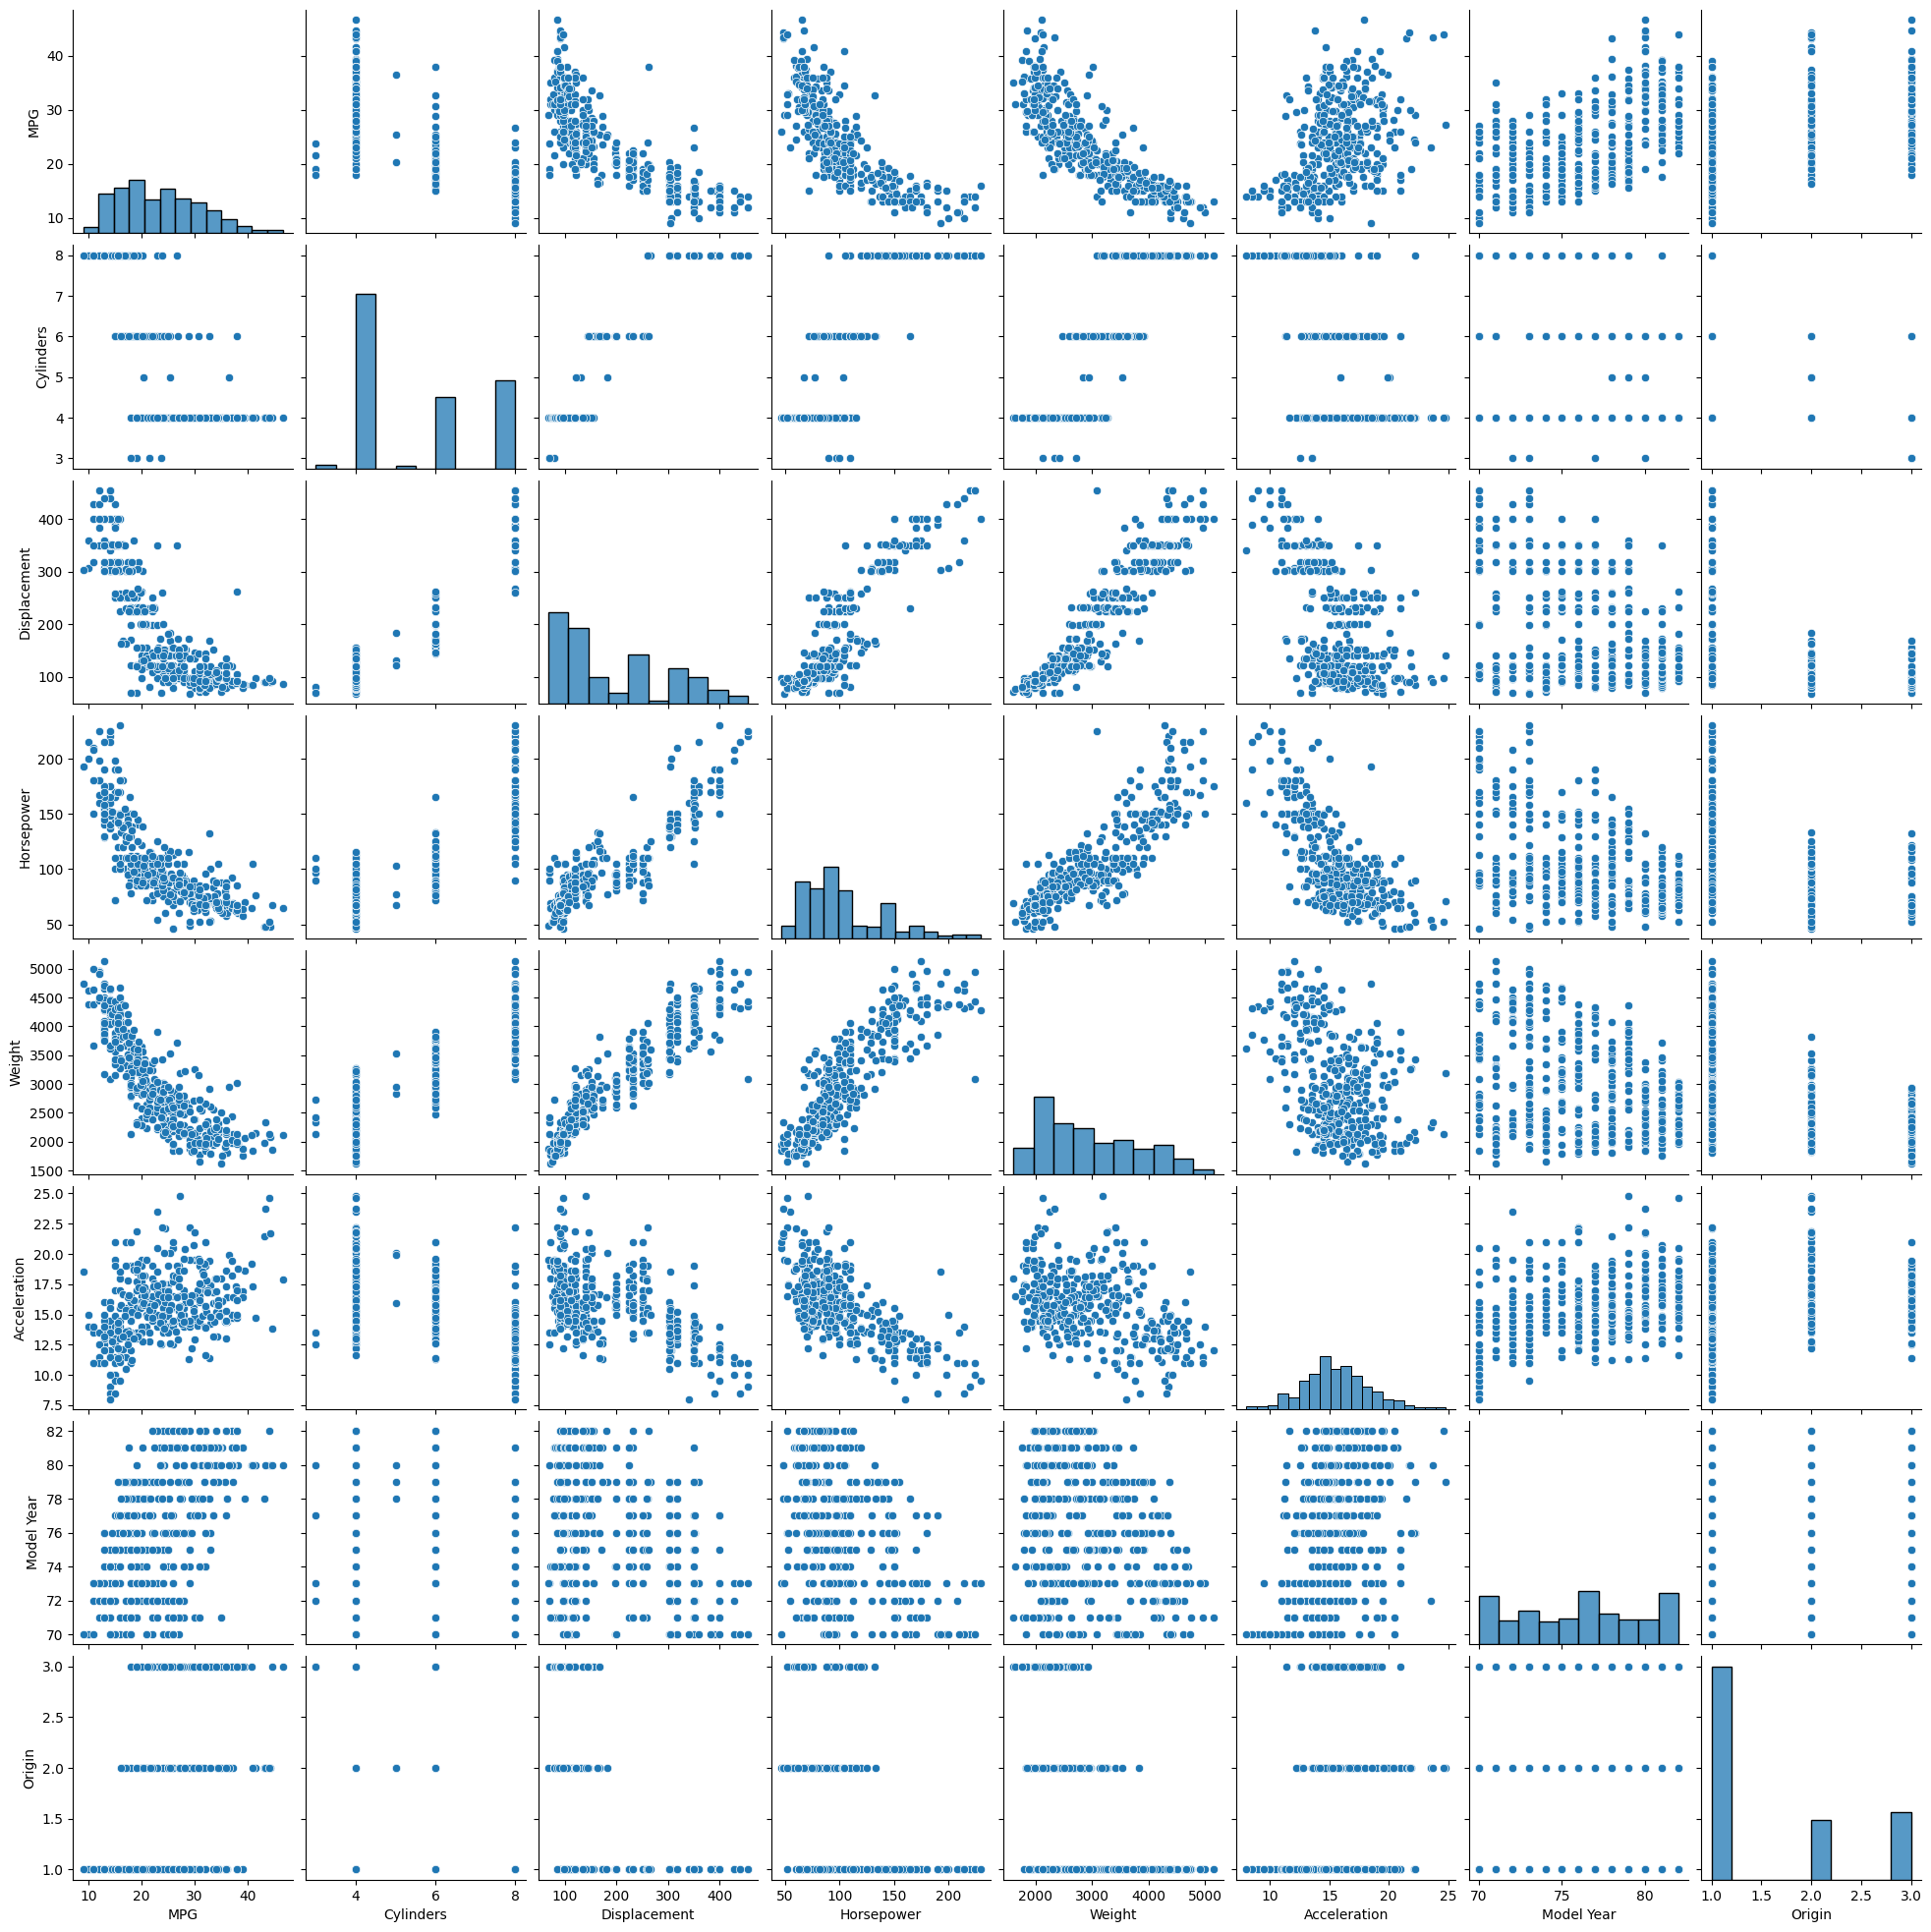

In [37]:
sns.pairplot(df)

Tambien revise las estadisticas generales:

In [38]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<Axes: >

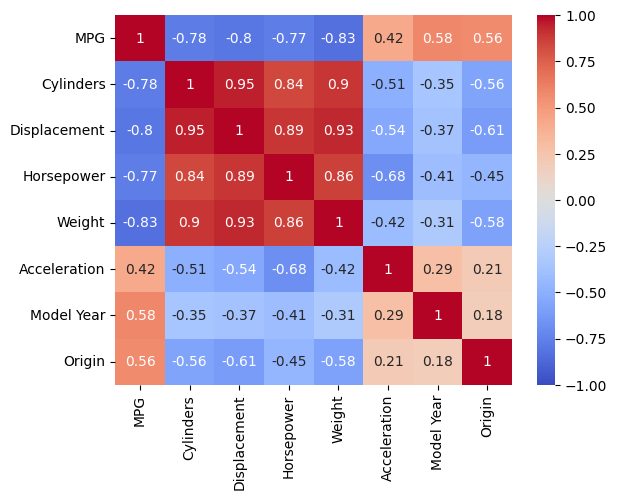

In [39]:
sns.heatmap(df.corr(), annot=True, vmin=-1, cmap="coolwarm")

### Separa las features del target

Separe el target de las features.

In [42]:
X_train = train.drop(columns="MPG")
X_test = test.drop(columns="MPG")
y_train = train['MPG']
y_test = test['MPG']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 7)
(80, 7)
(318,)
(80,)


### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [44]:
X_train.shape

(318, 7)

In [46]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(16),
    keras.layers.Dense(1)
])

model.compile(
    loss = "mse",
    optimizer = keras.optimizers.RMSprop(0.001),
    metrics = ['mae']
)

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                512       
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1569 (6.13 KB)
Trainable params: 1569 (6.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
7 * 64 + 64

512

In [49]:
64 * 16 + 16

1040

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [53]:
X_train_scal.shape[0] * 0.8 / 32

7.95

In [55]:
early_stopping = keras.callbacks.EarlyStopping(patience=10)

history = model.fit(
    X_train_scal,
    y_train,
    epochs = 1000,
    validation_split = 0.2,
    callbacks=[early_stopping]
)

Epoch 1/1000


8/8 [==============================] - 1s 35ms/step - loss: 605.1124 - mae: 23.4190 - val_loss: 517.5788 - val_mae: 21.3363
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 558.1432 - mae: 22.4274 - val_loss: 480.1945 - val_mae: 20.4611
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 516.0677 - mae: 21.5125 - val_loss: 442.9997 - val_mae: 19.5687
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 473.0936 - mae: 20.5435 - val_loss: 404.4159 - val_mae: 18.6047
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 427.4816 - mae: 19.4709 - val_loss: 363.8638 - val_mae: 17.5437
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 379.7096 - mae: 18.2804 - val_loss: 321.8401 - val_mae: 16.3662
Epoch 7/1000
8/8 [==============================] - 0s 10ms/step - loss: 330.4716 - mae: 16.9548 - val_loss: 278.6608 - val_mae: 15.0882
Epoch 8/1000
8/8 [==========================

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [57]:
history.history

{'loss': [605.1123657226562,
  558.1432495117188,
  516.0677490234375,
  473.0936279296875,
  427.4815673828125,
  379.7095947265625,
  330.4715881347656,
  281.0131530761719,
  232.92762756347656,
  187.5338897705078,
  145.9754638671875,
  111.77022552490234,
  85.04713439941406,
  66.24720764160156,
  54.19139862060547,
  46.37131881713867,
  40.68171310424805,
  36.06605529785156,
  31.758464813232422,
  28.022048950195312,
  24.673690795898438,
  21.93288230895996,
  19.467544555664062,
  17.470420837402344,
  15.782096862792969,
  14.44852066040039,
  13.534578323364258,
  12.737412452697754,
  11.979118347167969,
  11.373167991638184,
  10.996281623840332,
  10.650582313537598,
  10.183963775634766,
  9.859894752502441,
  9.736331939697266,
  9.656258583068848,
  9.218903541564941,
  9.015517234802246,
  9.056232452392578,
  8.769826889038086,
  8.516590118408203,
  8.344148635864258,
  8.197704315185547,
  8.342184066772461,
  8.085025787353516,
  7.873593807220459,
  7.8828301

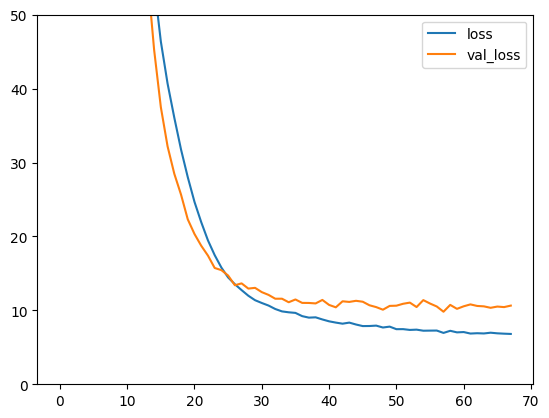

In [61]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.ylim(0,50);

¿Alguna conclusión respecto a este gráfico?

Earlystopping me ha ayudado a detener el entrenamiento para no caer en overfitting, también para ahorrar recursos innecesarios.

Observamos que si le damos muchas epochs al entrenamiento tiende a un overfitting, siendo el error en validación cada vez más alto. Sería interesante utilizar un número aprox de 30 epochs

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Visualiza el progreso de entrenamiento.

Interpreta el gráfico

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [63]:
model.evaluate(X_test_scal, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 8.6960 - mae: 2.0765


[8.695969581604004, 2.0764825344085693]

Ahora prueba el modelo. Coge 10 ejemplos de test y llama a` model.predict`.

In [64]:
model.predict(X_test_scal[:10])

1/1 [==============================] - 0s 165ms/step


array([[14.32453 ],
       [14.343153],
       [20.833149],
       [24.218136],
       [16.462244],
       [12.217223],
       [18.495726],
       [28.191935],
       [25.536362],
       [27.650534]], dtype=float32)

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

In [65]:
y_pred = model.predict(X_test_scal)

3/3 [==============================] - 0s 2ms/step


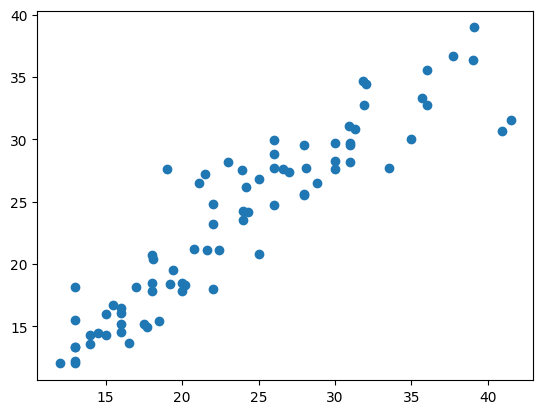

In [66]:
plt.scatter(y_test, y_pred)

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

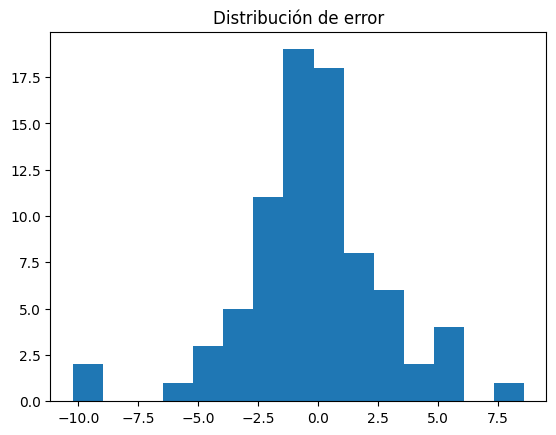

In [74]:
error = y_pred.reshape(-1) - y_test
plt.hist(error, bins=15);
plt.title("Distribución de error");

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

Guarda tu modelo en un archivo.

In [77]:
model.save("final_model.keras")

In [78]:
imported_model = keras.models.load_model("final_model.keras")
imported_model

## Conclusion